# Mellors MSDS 610 Final Project - Notebook 1: Parts 1-5

**IMPORTANT NOTE:** I have ran and re-ran the models again and again and tried a number of different things, but no matter what, even though my model looks good on the testing and validation model (r2 = ~0.74), I cannot get my model to perform well on the live data (r2 = ~ 0.42). I cannot figure out what, if anything, I am doing wrong. 

# Part 1: Scenario Selection

For this assignment, I am choosing Scenario 2: Used Cars.

"You just got a job working for a pre-owned car company in Albuquerque, New Mexico that buys and sells vehicles in the area. You’ve been tasked with determining the asking sells price of a used vehicle based on it’s characteristics."

The data set can be found here: 
https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

# Part 2: Split and Store Data

## Part 2, Section 1: Creating 100 "Live Data" DF and Exporting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import datetime
import pickle
import psycopg2
from sqlalchemy import create_engine
import joblib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
df = pd.read_csv("vehicles.csv")

In [4]:
df.sample(2)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
147800,7314652435,https://stlouis.craigslist.org/cto/d/granite-c...,"st louis, MO",https://stlouis.craigslist.org,4200,1974.00,chevrolet,p30 step van,good,8 cylinders,...,NaN,NaN,NaN,https://images.craigslist.org/01010_3Nw4KCLy0n...,70's style bread truck with 90's era engine. ...,NaN,il,38.73,-90.11,2021-04-29T21:22:09-0500
282055,7312353186,https://utica.craigslist.org/ctd/d/utica-2014-...,utica-rome-oneida,https://utica.craigslist.org,27990,2014.00,toyota,tacoma access cab pickup,good,NaN,...,NaN,pickup,red,https://images.craigslist.org/00X0X_1cMDo5xqSu...,Carvana is the safer way to buy a car During t...,NaN,ny,43.10,-75.23,2021-04-25T12:01:11-0400


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [6]:
live_data = df.sample(n=100, random_state = 4)

In [7]:
live_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 118825 to 43001
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            100 non-null    int64  
 1   url           100 non-null    object 
 2   region        100 non-null    object 
 3   region_url    100 non-null    object 
 4   price         100 non-null    int64  
 5   year          100 non-null    float64
 6   manufacturer  96 non-null     object 
 7   model         100 non-null    object 
 8   condition     53 non-null     object 
 9   cylinders     55 non-null     object 
 10  fuel          100 non-null    object 
 11  odometer      100 non-null    float64
 12  title_status  100 non-null    object 
 13  transmission  100 non-null    object 
 14  VIN           65 non-null     object 
 15  drive         71 non-null     object 
 16  size          20 non-null     object 
 17  type          79 non-null     object 
 18  paint_color   69 non-null   

In [8]:
live_data.to_csv("live_data.csv", index=False)

In [9]:
live_data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
118825,7313679206,https://tampa.craigslist.org/hil/cto/d/clearwa...,tampa bay area,https://tampa.craigslist.org,3900,2010.00,mercury,milan,like new,NaN,...,NaN,sedan,white,https://images.craigslist.org/00000_k02RAtflGh...,Se habla Español llame hoy lindo Mercury Milan...,NaN,fl,27.99,-82.74,2021-04-27T22:53:03-0400
96603,7304296203,https://fortmyers.craigslist.org/chl/ctd/d/sar...,ft myers / SW florida,https://fortmyers.craigslist.org,68788,2015.00,ford,f-250,NaN,NaN,...,NaN,pickup,NaN,https://images.craigslist.org/00707_gS1GXl7y42...,2015 Ford F-250 F250 F 250 SRW PLATINUM 4x4 TU...,NaN,fl,27.27,-82.48,2021-04-09T14:42:04-0400
261039,7312289104,https://albuquerque.craigslist.org/ctd/d/albuq...,albuquerque,https://albuquerque.craigslist.org,19990,2018.00,ford,escape sel sport utility 4d,good,NaN,...,NaN,other,black,https://images.craigslist.org/00o0o_gIdsTcCInJ...,Carvana is the safer way to buy a car During t...,NaN,nm,35.11,-106.62,2021-04-25T07:41:06-0600
13925,7316774765,https://tucson.craigslist.org/cto/d/tucson-200...,tucson,https://tucson.craigslist.org,2900,2000.00,gmc,safari,NaN,6 cylinders,...,NaN,van,NaN,https://images.craigslist.org/01616_2vDoXKxZpL...,"2000 GMC SAFARI JUST PASSED EMISSIONS, 189K MI...",NaN,az,32.21,-110.88,2021-05-04T09:30:39-0700
280583,7314927546,https://syracuse.craigslist.org/ctd/d/oswego-2...,syracuse,https://syracuse.craigslist.org,10295,2012.00,gmc,acadia slt awd,NaN,6 cylinders,...,NaN,NaN,NaN,https://images.craigslist.org/00H0H_6J4OvGYYtb...,2012 GMC Acadia Trim SLT Sport Utility 4D Mile...,NaN,ny,43.46,-76.45,2021-04-30T14:20:25-0400


In [10]:
df = df.drop(live_data.index)

In [11]:
df.shape

(426780, 26)

In [12]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


## Part 2, Section 2: Storing Raw DF to PgAdmin

**IMPORTANT NOTE:** I am commenting out this section (after my initial run) because I tend to run and re-run my notebooks many times and this section is time consuming and I don't need to keep replacing the dataset in PgAdmin.

**Below:** I am creating a new table that will store my raw data (without the "live" sample") in PgAdmin,  This will allow me to access the dataset in seperate notebooks.

In [13]:
host = r'127.0.0.1' 
db = r'MSDS610' 
user = r'postgres' 
pw = r'postgres' 
port = r'5432'
schema = r'raw'

In [14]:
#db_conn = create_engine("postgresql://{}:{}@{}:{}/{}".format(user, pw, host, port, db))
#db_conn

In [15]:
#sql = "SELECT tables.table_name FROM information_schema.tables WHERE table_schema = '" + schema + "' ORDER BY 1;"
#sql

In [16]:
#table_name = r'vehicle_data'

In [17]:
# df.to_sql(table_name, con=db_conn, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')

In [18]:
#tbl_df = pd.read_sql(sql, db_conn, index_col=None)
#tbl_df

![pgAdmin Screenshot](msds_610_final_project_raw_df_to_pgadmin_img.png)

# Part 3: Data Definition and Analytical Question

**DATA DEFINITION**

**The 4 types of data types:**
- Ordinal: Categories with order or ranking (i.e: low, medium, high)
- Nominal: Categories without order (i.e: car models)
- Discrete: Categories with countable, whole numbers (i.e: # of car doors)
- Countinuous: Categories that have measurable values that can take any value in a range (i.e.: car prices)

Note: "String" means "Object" in the following descriptions.

**The Features:**

The dataset is a dataframe of 26 features and 426880 entries (before removing the 100 "live data" samples), with a mix of floats (float64), integers (int64) and strings (object) and include the following features:

- **'id'** (Nominal, Integer): A unique identifier number for each entry.
- **'url'** (Nominal, String): A unique URL to the location of the vehicle for sale.
- **'region'** (Nominal, String): Area where the vehicle is being sold.
- **'region_url'** (Nominal, String): unique URL of the Craigslist for the region.
- **'price'** (Continuous, Integer): The asking price of the car for sale.
- **'year'** (Nominal, Integer - Note: Listed as floats): The year the vehicle was made.
- **'manufacturer'** (Nominal, String): The company that made the vehicle.
- **'model'** (Nominal, String): The name/type of the vehicle.
- **'condition'** (Ordinal, String): Categories (6) - "good", "excellent", "like new", "fair", "new", "salvage". The condition of the vehicle for sale.
- **'cylinders'** (Nominal, String): Note: This could also be be described as Ordinal, since more cylinders could mean more power, but since my analytical question isn't to find the most "powerful" vehicle, I am classifying at as Nominal. But it likely should be converted to "Discrete" because it is listed as text because the entries end with "cylinder" and have a "other" option, but could be converted to integers. This feature describes the number of cylinders in the engine of the car for sale.
- **'fuel'** (Nominal, String): Values (5) - "gas", "other", "diesel", "hybrid", "electric". The type(s) of fuel the vehicle for sale runs on.
- **'odometer'** (Continuous, Float): Note: Could be converted to Integer, because it looks like the values are rounded to a whole number. The number of miles on the engine of the vehicle.
- **'title_status'** (Nominal, String): Values (6): "clean" = no issues, "rebuilt" = fixed and passed inspection, "salvage" = total loss, "lien" = outstanding loan, "missing" = no title, "parts only" = can only be used for parts. This describes the legal status of the vehicles condition and use.
- **'transmission'** (Nominal, String): Values: "automatic", "manual", "other". How power is delivered from the engine to the wheels.
- **'VIN'** (Nominal, String): A unique 17-character code for each vehicle.
- **'drive'** (Nominal, String): Values: "fwd" = front wheel drive, "4wd" = 4 wheel drive, "rwd" = rear wheel drive. The drivetrain of the vehicle, how power is distributed to the tires. 
- **'size'** (Ordinal, String): Values: "full-size" = largest, "mid-size" = third smallest, "compact" = second smallest, "sub-compact" = smallest. The body size classification of the vehicle.
- **'type'** (Nominal, String): 13 Values (i.e.: "sedan", "SUV", "truck"). The body style of the vehicle.
- **'paint_color'** (Nominal, String): 12 Values (i.e: "gray", "black", "blue").  The color of the vehicle for sale.
- **'image_url'** (Nominal, String). The URL for the image posted of the vehicle for sale.
- **'description'** (Nominal, String). A written summary about the vehicle for sale. 
- **'county'** NOTE: This feature is all NULL (NAN) in the dataframe. This would be a Nominal, String of what county the vehicle for sale is. No informational value, will drop this feature.
- **'state'** (Nominal, String). The state where the vehicle for sale is located. Uses a two-character state code (i.e: "ny", "fl", "me")
- **'lat'** (Continuous, Float). The latitudinal location of the vehicle for sale.
- **'long'** (Continuous, Float). The longitudinal location of the vehicle for sale.
- **'posting_date'** (DateTime, String). In the format: YYYY-MM-DDTHH:MM:SS±HHMM. The time when the vehicle listing was posted on the website.

**ANALYTICAL QUESTION AND TARGET**

**Analytical Question:** What vehicle features can I use to predict the sale prices of vehicles being sold in Albuquerque, New Mexico.    
**Target:** "price"

**Below:** I used a mix of the "nunique", "value_counts", "total_values", and "info" functions to help describe each of the features (as described above).

In [19]:
df.sample(2)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
220029,7308344771,https://columbiamo.craigslist.org/ctd/d/columb...,columbia / jeff city,https://columbiamo.craigslist.org,40990,2019.00,chevrolet,camaro ss coupe 2d,good,8 cylinders,...,NaN,coupe,NaN,https://images.craigslist.org/00h0h_3elhPqitgh...,Carvana is the safer way to buy a car During t...,NaN,mo,38.95,-92.32,2021-04-17T12:40:52-0500
46444,7314457142,https://redding.craigslist.org/ctd/d/rancho-co...,redding,https://redding.craigslist.org,26999,2007.00,mercedes-benz,sl550,NaN,8 cylinders,...,NaN,convertible,silver,https://images.craigslist.org/01414_4EXIaSKeMS...,Finance @ www.ElegantAutoSales.net - Paste the...,NaN,ca,38.61,-121.27,2021-04-29T12:05:06-0700


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426780 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426780 non-null  int64  
 1   url           426780 non-null  object 
 2   region        426780 non-null  object 
 3   region_url    426780 non-null  object 
 4   price         426780 non-null  int64  
 5   year          425575 non-null  float64
 6   manufacturer  409138 non-null  object 
 7   model         421503 non-null  object 
 8   condition     252723 non-null  object 
 9   cylinders     249147 non-null  object 
 10  fuel          423767 non-null  object 
 11  odometer      422380 non-null  float64
 12  title_status  418538 non-null  object 
 13  transmission  424224 non-null  object 
 14  VIN           265773 non-null  object 
 15  drive         296242 non-null  object 
 16  size          120499 non-null  object 
 17  type          333943 non-null  object 
 18  paint_col

In [21]:
df.condition.nunique()

6

In [22]:
df.condition.value_counts()

condition
good         121424
excellent    101453
like new      21174
fair           6766
new            1305
salvage         601
Name: count, dtype: int64

In [23]:
df.cylinders.nunique()

8

In [24]:
df.cylinders.value_counts()

cylinders
6 cylinders     94149
4 cylinders     77624
8 cylinders     72045
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: count, dtype: int64

In [25]:
df.fuel.value_counts()

fuel
gas         356124
other        30722
diesel       30055
hybrid        5168
electric      1698
Name: count, dtype: int64

In [26]:
df.odometer.sample(4)

394044   179000.00
178473   133745.00
133527    57337.00
104468   136146.00
Name: odometer, dtype: float64

In [27]:
df.title_status.nunique()

6

In [28]:
df.title_status.value_counts()

title_status
clean         405020
rebuilt         7217
salvage         3867
lien            1422
missing          814
parts only       198
Name: count, dtype: int64

In [29]:
df.transmission.value_counts()

transmission
automatic    336448
other         62667
manual        25109
Name: count, dtype: int64

In [30]:
df.VIN.sample(3)

293804    2C3CDZDJ5GH315931
198666                  NaN
86891     JN8AS58V48W118061
Name: VIN, dtype: object

In [31]:
df.drive.nunique()

3

In [32]:
df.drive.value_counts()

drive
4wd    131868
fwd    105493
rwd     58881
Name: count, dtype: int64

In [33]:
df['size'].value_counts()

size
full-size      63456
mid-size       34469
compact        19380
sub-compact     3194
Name: count, dtype: int64

In [34]:
df.type.nunique()

13

In [35]:
df.type.value_counts()

type
sedan          87031
SUV            77273
pickup         43497
truck          35271
other          22102
coupe          19199
hatchback      16597
wagon          10747
van             8544
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: count, dtype: int64

In [36]:
df.paint_color.nunique()

12

In [37]:
df.paint_color.value_counts()

paint_color
white     79267
black     62846
silver    42954
blue      31217
red       30470
grey      24410
green      7341
custom     6699
brown      6591
yellow     2142
orange     1984
purple      687
Name: count, dtype: int64

In [38]:
df.image_url.sample(5)

106037    https://images.craigslist.org/00c0c_8o1J3eozJd...
2450      https://images.craigslist.org/00T0T_5YAa6EHhsP...
413429    https://images.craigslist.org/00K0K_jO8zDaUS4U...
223214    https://images.craigslist.org/00Y0Y_h6Y6d7M0ak...
378691    https://images.craigslist.org/00h0h_4wdXzPF3Qa...
Name: image_url, dtype: object

In [39]:
df.description.sample(3)

34003     THE BEST LOOKING !!!!!  save thousands !!!  fi...
224328    For more information on this Jeep and to acces...
314165    2011 Ford F150 XLT SuperCrew Cab 139K Miles Cl...
Name: description, dtype: object

In [40]:
df.county.nunique()

0

In [41]:
df.state.nunique()

51

In [42]:
df.state.sample(3)

270893    ny
386759    vt
223824    mt
Name: state, dtype: object

In [43]:
df.lat.sample(3)

275898   40.59
226382   47.70
300825   40.52
Name: lat, dtype: float64

In [44]:
df.long.sample(3)

110363   -82.49
243782   -77.66
301959   -83.48
Name: long, dtype: float64

In [45]:
df.posting_date.sample(3)

210443    2021-04-13T11:58:27-0400
237612    2021-04-21T11:08:22-0400
284910    2021-04-26T08:43:45-0400
Name: posting_date, dtype: object

# Part 4: Data Prep and Feature Selection

## Part 4, Section 1: Feature Selection

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426780 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426780 non-null  int64  
 1   url           426780 non-null  object 
 2   region        426780 non-null  object 
 3   region_url    426780 non-null  object 
 4   price         426780 non-null  int64  
 5   year          425575 non-null  float64
 6   manufacturer  409138 non-null  object 
 7   model         421503 non-null  object 
 8   condition     252723 non-null  object 
 9   cylinders     249147 non-null  object 
 10  fuel          423767 non-null  object 
 11  odometer      422380 non-null  float64
 12  title_status  418538 non-null  object 
 13  transmission  424224 non-null  object 
 14  VIN           265773 non-null  object 
 15  drive         296242 non-null  object 
 16  size          120499 non-null  object 
 17  type          333943 non-null  object 
 18  paint_col

In this section, I am deciding which features I want to keep - and which ones I want to drop - based on if I think they will help me answer my analytical question.

Below, I am listing each feature, along with my decision to keep or drop, along with an explanation. I will also rate the "keep" ones based on if I think (EDA and testing will give definitive answers) the feature has high, low, or medium, correspondance to my target ("price"). The decision to "keep" might change to "drop" after further EDA.


**The Features and Drop/Keep Decision**
- **'id':** Drop. This is unique to each entry and provides no informational value.
-  **'url':** Drop. This is unique to each entry and provides no information  value.
-  **'region':** Keep. Since I am looking to predict regional prices, this is high value 
-  **'region_url':** Drop. This the URL for the region, but since we already have a "region" feature", this has no value.
-  **'price':** Keep. This is my target variable.
-  **'year':** Keep. Since how old a vehicle is can have an effect on worth and depreciation, this has high value.
-  **'manufacturer':** Keep. This might have a low to medium value, since manufacturing sentiment *might* have an effect on vehicle value.
-  **'model':** Keep. Same as manufacturing, 'model' sentiment might have an effect on vehicle value.
- **'condition':**: Keep. The condition of the vehicle will most likely determine the price. Very high value.
- **'cylinders':** Keep. The engine size/type likely has an effect on price (the more cylinders, the higher the price), medium to high value.
-  **'fuel':** Keep. The type of fuel will likely influence the cost of the vehicle, medium to high value. 
-  **'odometer':** Keep. How many miles on the vehicle will most likely effect the sales price. Very high value.
- **'title_status':** Keep. I am not sure the value this would have - although, a clean title is likely better than a "parts-only" title - on price. Keeping to do more EDA.
- **'transmission':** Keep. Whether a vehicle is a manual or automatic transmission might effect price because of the different pools of potential buyers. 
- **'VIN':** Drop. Unique identifier number for each individual vehicle. This has no informational value.
- **'drive':** Keep. Whether the car is 4 wheel drive, rear wheel drive, or front wheel drive, may impact price. Continued EDA needed to make final determination.
- **'size':** Drop. While The size of the vehicle might contribute to the price, around 3/4s of entries are missing this information is missing, and vehicle "type" will likely be a better determinate.  
- **'type':** Keep. Whether a vehicle is a truck, sedan, SUV, likely influences the sales price, medium to high value.
- **'paint_color':** Drop. I don't think the paint color will have a high correlation on cost.
- **'image_url':** Drop. This has no informational value.
- **'description':** Drop. I considered keeping, and seeing if certain phrases, keywords, etc. effect pricing, but I feel that the technical information likely has much more value than the summarial.
- **'county':** Drop. This a NULL column. Description of this column from Kaggle: "useless column left in by mistake"
- **'state':** Keep. Since the company in the scenario is in New Mexico, this has high value.
- **'lat':** Drop. I considered keeping this to find the specific location of Albuquerque, NM, but I think I have enough information with "region" and "state" for local purposes.
- **'long':** Drop. Same reasoning at "lat".
- **'posting_date':** Drop. How long a vehicle has been posted might effect the price (i.e. the longer the posting is up, the lower the price goes). But, this isn't a technical feature of the vehicles, and given the scenario that I work at a used car lot, posting dates are not important (and other features would be better suited to determine depreciation, if that was the goal).

I will be doing EDA below to determine the best features, but I predict that the mileage (odometer), condition, year, type, and region, will have the highest impact on sales price.


### Dropping Low Value Feature

In [47]:
df.drop(columns=['id', 'url', 'region_url', 'description', 'VIN', 'image_url', 'description', 'county', 'lat', 'long', 'size', 'posting_date', "paint_color"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426780 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426780 non-null  object 
 1   price         426780 non-null  int64  
 2   year          425575 non-null  float64
 3   manufacturer  409138 non-null  object 
 4   model         421503 non-null  object 
 5   condition     252723 non-null  object 
 6   cylinders     249147 non-null  object 
 7   fuel          423767 non-null  object 
 8   odometer      422380 non-null  float64
 9   title_status  418538 non-null  object 
 10  transmission  424224 non-null  object 
 11  drive         296242 non-null  object 
 12  type          333943 non-null  object 
 13  state         426780 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 48.8+ MB


## Part 4, Section 2: EDA - NULLS

### 'Year' Nulls

In [48]:
df.year.nunique()

114

In [49]:
df.year.isna().value_counts()

year
False    425575
True       1205
Name: count, dtype: int64

**Below:** Since there is only 1,205 NULLS out of a 426,780 entries. I am going to replace the NULLs for year with median "year", because, given the small value of NULLs, I don't think it will have an impact on my analysis and predictions. Note: this feature is listed as a float, and should be an integer. As such, I am going to use the whole number median year for the NULLs and set the type to integer (astype(int)), to turn the feature into integers.

In [50]:
df.year.sample(3)

236343   2016.00
263819   2011.00
403468   2006.00
Name: year, dtype: float64

In [51]:
df.year.describe()

count   425575.00
mean      2011.24
std          9.45
min       1900.00
25%       2008.00
50%       2013.00
75%       2017.00
max       2022.00
Name: year, dtype: float64

In [52]:
df['year'] = df['year'].fillna(2011).astype(int)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426780 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426780 non-null  object 
 1   price         426780 non-null  int64  
 2   year          426780 non-null  int32  
 3   manufacturer  409138 non-null  object 
 4   model         421503 non-null  object 
 5   condition     252723 non-null  object 
 6   cylinders     249147 non-null  object 
 7   fuel          423767 non-null  object 
 8   odometer      422380 non-null  float64
 9   title_status  418538 non-null  object 
 10  transmission  424224 non-null  object 
 11  drive         296242 non-null  object 
 12  type          333943 non-null  object 
 13  state         426780 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(11)
memory usage: 47.2+ MB


**Below:** "year" is listed as a float, because of a hanging zero. I am going to switch the feature to an integer. 

In [54]:
df.year.sample(5)

421509    2015
273676    2007
71999     2015
182986    2015
402555    1993
Name: year, dtype: int32

### 'Manufacturer' Nulls

In [55]:
df.manufacturer.isna().value_counts()

manufacturer
False    409138
True      17642
Name: count, dtype: int64

The 'manufacturer' feature has 17,642 NULLs out of 426,780 total entries, this means "manufacturer" is missing about 4% of the data - which is considered low. As such, I am going to use filler text "unknown" to replace the missing values.

In [56]:
df['manufacturer'] = df['manufacturer'].fillna("unknown")

In [57]:
df.manufacturer.isna().value_counts()

manufacturer
False    426780
Name: count, dtype: int64

In [58]:
df.manufacturer.value_counts()

manufacturer
ford               70966
chevrolet          55053
toyota             34194
honda              21263
nissan             19065
jeep               19010
ram                18341
unknown            17642
gmc                16775
bmw                14694
dodge              13705
mercedes-benz      11816
hyundai            10336
subaru              9492
volkswagen          9344
kia                 8453
lexus               8198
audi                7571
cadillac            6953
chrysler            6030
acura               5976
buick               5500
mazda               5426
infiniti            4801
lincoln             4219
volvo               3374
mitsubishi          3291
mini                2376
pontiac             2288
rover               2113
jaguar              1945
porsche             1383
mercury             1183
saturn              1090
alfa-romeo           896
tesla                868
fiat                 791
harley-davidson      153
ferrari               95
datsun      

### 'Model' NULLs

I was going to give the 'model' feature the same treatment as 'manufacturer', but given that there are nearly 30,000 unique values, and that other features are likely going to be much more important in determining price, I am opting to drop this column at this point.

In [59]:
df.model.isna().value_counts()

model
False    421503
True       5277
Name: count, dtype: int64

In [60]:
df.model.nunique()

29663

In [61]:
df.drop(columns=["model"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426780 entries, 0 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426780 non-null  object 
 1   price         426780 non-null  int64  
 2   year          426780 non-null  int32  
 3   manufacturer  426780 non-null  object 
 4   condition     252723 non-null  object 
 5   cylinders     249147 non-null  object 
 6   fuel          423767 non-null  object 
 7   odometer      422380 non-null  float64
 8   title_status  418538 non-null  object 
 9   transmission  424224 non-null  object 
 10  drive         296242 non-null  object 
 11  type          333943 non-null  object 
 12  state         426780 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(10)
memory usage: 44.0+ MB


### "Condition" and "Odometer" Nulls

**Below:** More than a third of the "condition" feature has missing values. Since I think that this has high correlation on my predictions, I am opting to impute for the missing values.

In [62]:
df.condition.isna().value_counts()

condition
False    252723
True     174057
Name: count, dtype: int64

In [63]:
df.condition.value_counts()

condition
good         121424
excellent    101453
like new      21174
fair           6766
new            1305
salvage         601
Name: count, dtype: int64

**Below:** Since I want to use a groupby function, and I want it impute it based on year and odometer, I have to make sure that the columns can be used to impute. Since "odometer" is a continuous value, I am going to create a new feature called "mileage" which will rate the vehicle as "low", "normal", "high" mileage, so that I can use it to impute my "condition" column. I am using "year" because it is likely that older cars will have poorer condition and I am using "odometer" because the higher the mileage the more wear and tear on the vehicle.

Since "odometer" has missing values (4400) and I want to use 'odometer' to impute the condition, I am going to have to impute its NULLs now. Given how small the number is, I am going to use the median odometer reading to fill in the 'odometer' NULLs.

In [64]:
df.odometer.isna().value_counts()

odometer
False    422380
True       4400
Name: count, dtype: int64

In [65]:
df.odometer.describe()

count     422380.00
mean       98044.85
std       213904.60
min            0.00
25%        37710.00
50%        85548.00
75%       133544.00
max     10000000.00
Name: odometer, dtype: float64

In [66]:
df['odometer'] = df['odometer'].fillna(98045)

**Below:** I searched around the internet to get an idea of what is considered low, medium, and high mileage. There was no general consensus I could find, so I used my best judgement based on what I found, and opted to classify mileage as "low" if under 60,000 miles, "medium" between 60,000-120,000 and "high" as over 120,000. 

I was able to get good class balance with those numbers, with each category roughly 1/3 of the entries.

In [67]:
def classify_mileage(odometer):
    if odometer < 60_000:
        return "low"
    elif odometer < 120_000:
        return "medium"
    else:
        return "high"

In [68]:
df['mileage'] = df['odometer'].apply(classify_mileage)

In [69]:
df.mileage.value_counts()

mileage
low       154474
medium    138917
high      133389
Name: count, dtype: int64

**Below:** Now that I have a way to use the miles (with the new "mileage" feature), I can impute for "condition" using the new feature ("mileage") and "year". I am using a groupby function that uses those features to fill the "condition" NULLs with the mode of the group. Meaning, it will replace the NULL with the most frequent "condition" that exists given all the possible arrangements of the groupby features.

In [70]:
df.condition.isna().value_counts()

condition
False    252723
True     174057
Name: count, dtype: int64

In [71]:
df.condition.value_counts()

condition
good         121424
excellent    101453
like new      21174
fair           6766
new            1305
salvage         601
Name: count, dtype: int64

In [72]:
df['condition'] = df.groupby(['year', 'mileage'])['condition'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else "unknown"))

In [73]:
df.condition.value_counts()

condition
excellent    210368
good         186467
like new      21177
fair           6819
new            1319
salvage         601
unknown          29
Name: count, dtype: int64

In [74]:
df.condition.isna().value_counts()

condition
False    426780
Name: count, dtype: int64

**Above:** It looks like, through the imputing, that the condition values all increased in about equal parts (their values seem to carry the same class weight as they did before the NULLs were imputed). I see that my function was unable to determine 29 entries and labeled them (as I specified) as unknown. 

**Below:** Since "unknown" is such a low number (29)  and I still want to classify them in the original values, I am going to add them to the "excellent" column, since that column is roughly 50% of the total dataframe, it is the best option to choose to impute the "unknowns". The reason I didn't do this in the initial function was because I didn't know how many "unknowns" would exist, and so I wouldn't know the best way to treat them, that is why I am doing that in two parts.

In [75]:
df['condition'].replace("unknown", "excellent", inplace=True)

In [76]:
df.condition.value_counts()

condition
excellent    210397
good         186467
like new      21177
fair           6819
new            1319
salvage         601
Name: count, dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426780 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426780 non-null  object 
 1   price         426780 non-null  int64  
 2   year          426780 non-null  int32  
 3   manufacturer  426780 non-null  object 
 4   condition     426780 non-null  object 
 5   cylinders     249147 non-null  object 
 6   fuel          423767 non-null  object 
 7   odometer      426780 non-null  float64
 8   title_status  418538 non-null  object 
 9   transmission  424224 non-null  object 
 10  drive         296242 non-null  object 
 11  type          333943 non-null  object 
 12  state         426780 non-null  object 
 13  mileage       426780 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(11)
memory usage: 47.2+ MB


### 'Cylinders' NULLS

"Cylinders" is missing roughly 1/3 of the data. I am going to try to impute it based on some of the other features. I think I am going to use "type" (since SUVs will have more cylinders and compacts will likely have less) and "fuel" (since EVs have no cylinders and diesels tend to have more).

In [78]:
df.cylinders.isna().value_counts()

cylinders
False    249147
True     177633
Name: count, dtype: int64

In [79]:
df['cylinders'] = df.groupby(['type', 'fuel'])['cylinders'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else "unknown"))

In [80]:
df.cylinders.isna().value_counts()

cylinders
False    332102
True      94678
Name: count, dtype: int64

In [81]:
df.cylinders.value_counts()

cylinders
6 cylinders     121401
4 cylinders     107092
8 cylinders      97837
other             2282
5 cylinders       1502
10 cylinders      1209
3 cylinders        592
12 cylinders       186
unknown              1
Name: count, dtype: int64

**Above:** After imputing with "type" and "fuel" I have lowered the NULLs, but still have ~95,000. 

**Below:** I am going to continue to impute. I am going to now impute the remaining with "year" and "manufacturer", since the number of cylinders could be determined by the year the vehicle was made and by whom.

After imputing with "year" and "manufacturer" I was able to impute the remaining NULLs for "cylinders"

In [82]:
df['cylinders'] = df.groupby(['year', 'manufacturer'])['cylinders'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else "unknown"))

In [83]:
df.cylinders.isna().value_counts()

cylinders
False    426780
Name: count, dtype: int64

In [84]:
df.cylinders.value_counts()

cylinders
6 cylinders     146220
8 cylinders     140959
4 cylinders     133107
other             2499
5 cylinders       1739
10 cylinders      1209
3 cylinders        628
unknown            225
12 cylinders       194
Name: count, dtype: int64

**Below:** Since I am already working in "cylinders" and I notice that they will likely be more useful in prediction as integers. I am going to change them to integers now. I am going to list the "other" as 0, since there is only 2,016 entries and unlikely to affect the data (and likely they are none of the most commonly listed ones, or they would have listed it as such), and I am going to reclassify "unknown" to the 4 cylinders because it is the most common type of engine.

In [85]:
df['cylinders'].replace("6 cylinders", 6, inplace=True)
df['cylinders'].replace("8 cylinders", 8, inplace=True)
df['cylinders'].replace("4 cylinders", 4, inplace=True)
df['cylinders'].replace("5 cylinders", 5, inplace=True)
df['cylinders'].replace("10 cylinders", 10, inplace=True)
df['cylinders'].replace("3 cylinders", 3, inplace=True)
df['cylinders'].replace("12 cylinders", 12, inplace=True)
df['cylinders'].replace("other", 0, inplace=True)
df['cylinders'].replace("unknown", 4, inplace=True)

In [86]:
df.cylinders.value_counts()

cylinders
6     146220
8     140959
4     133332
0       2499
5       1739
10      1209
3        628
12       194
Name: count, dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426780 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426780 non-null  object 
 1   price         426780 non-null  int64  
 2   year          426780 non-null  int32  
 3   manufacturer  426780 non-null  object 
 4   condition     426780 non-null  object 
 5   cylinders     426780 non-null  int64  
 6   fuel          423767 non-null  object 
 7   odometer      426780 non-null  float64
 8   title_status  418538 non-null  object 
 9   transmission  424224 non-null  object 
 10  drive         296242 non-null  object 
 11  type          333943 non-null  object 
 12  state         426780 non-null  object 
 13  mileage       426780 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(10)
memory usage: 47.2+ MB


### "Fuel" NULLs

There only 3,013 "fuel" NULLs, which is less than 1% of the feature. As such, I am going to reclassify the NULLS as "gas", given that "gas" makes up the class majority with 356,000 of the entries. While some of the NULLs might not be gas, it is highly likely that the majority of them are. 

In [88]:
df.fuel.isna().value_counts()

fuel
False    423767
True       3013
Name: count, dtype: int64

In [89]:
df.fuel.value_counts()

fuel
gas         356124
other        30722
diesel       30055
hybrid        5168
electric      1698
Name: count, dtype: int64

In [90]:
df.fuel.fillna("gas", inplace=True)

In [91]:
df.fuel.isna().value_counts()

fuel
False    426780
Name: count, dtype: int64

In [92]:
df.fuel.value_counts()

fuel
gas         359137
other        30722
diesel       30055
hybrid        5168
electric      1698
Name: count, dtype: int64

### "Title_Status" NULLs

There are only 8,242 NULL values for "title_status" with the vast majority (400,000) being "clean", as such, I feel like I can impute the NULLs as "clean" and have little affect on the analytics. Also, given the incredibly high class imbalance, I will likely drop this feature, as it will probably have little impact on the price. But, I will make that decision later.

In [93]:
df.title_status.isna().value_counts()

title_status
False    418538
True       8242
Name: count, dtype: int64

In [94]:
df.title_status.value_counts()

title_status
clean         405020
rebuilt         7217
salvage         3867
lien            1422
missing          814
parts only       198
Name: count, dtype: int64

In [95]:
df.title_status.fillna("clean", inplace=True)

In [96]:
df.title_status.isna().value_counts()

title_status
False    426780
Name: count, dtype: int64

In [97]:
df.title_status.value_counts()

title_status
clean         413262
rebuilt         7217
salvage         3867
lien            1422
missing          814
parts only       198
Name: count, dtype: int64

### 'Transmission' NULLs

Just like "title_status", this feature has a very low amount of missing values and has an overwhelming class. In this case, there are 2,556 NULLs and 336,448 entries labeled as "automatic". I will impute the NULLs to the majority class.

In [98]:
df.transmission.isna().value_counts()

transmission
False    424224
True       2556
Name: count, dtype: int64

In [99]:
df.transmission.value_counts()

transmission
automatic    336448
other         62667
manual        25109
Name: count, dtype: int64

In [100]:
df.transmission.fillna("automatic", inplace=True)

In [101]:
df.transmission.isna().value_counts()

transmission
False    426780
Name: count, dtype: int64

In [102]:
df.transmission.value_counts()

transmission
automatic    339004
other         62667
manual        25109
Name: count, dtype: int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426780 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426780 non-null  object 
 1   price         426780 non-null  int64  
 2   year          426780 non-null  int32  
 3   manufacturer  426780 non-null  object 
 4   condition     426780 non-null  object 
 5   cylinders     426780 non-null  int64  
 6   fuel          426780 non-null  object 
 7   odometer      426780 non-null  float64
 8   title_status  426780 non-null  object 
 9   transmission  426780 non-null  object 
 10  drive         296242 non-null  object 
 11  type          333943 non-null  object 
 12  state         426780 non-null  object 
 13  mileage       426780 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(10)
memory usage: 47.2+ MB


### "Drive" NULLs

"Drive" is missing roughly 1/3 of the entries, as such I am going to impute.

In [104]:
df.drive.isna().value_counts()

drive
False    296242
True     130538
Name: count, dtype: int64

In [105]:
df.drive.value_counts()

drive
4wd    131868
fwd    105493
rwd     58881
Name: count, dtype: int64

**Below:** To impute, I am going to use the groupby function (like I have used on previous NULLs) and use "type", because I think that the type of vehicle is a good indicator of the type of drive.

In [106]:
df['drive'] = df.groupby(['type'])['drive'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else "unknown"))

In [107]:
df.drive.isna().value_counts()

drive
False    333943
True      92837
Name: count, dtype: int64

In [108]:
df.drive.value_counts()

drive
4wd    143197
fwd    132902
rwd     57844
Name: count, dtype: int64

**Below:** Since, "type" resolved many, but not all, of my NULLs, I am going to do a second impute that uses "manufacturer" on the rest of the NULL entries, given that that certain manufacturers may have a preference on the type of drive.

This resolved the rest of the NULLs

In [109]:
df['drive'] = df.groupby(['manufacturer'])['drive'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else "unknown"))

In [110]:
df.drive.isna().value_counts()

drive
False    426780
Name: count, dtype: int64

In [111]:
df.drive.value_counts()

drive
4wd    190435
fwd    167800
rwd     68545
Name: count, dtype: int64

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426780 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426780 non-null  object 
 1   price         426780 non-null  int64  
 2   year          426780 non-null  int32  
 3   manufacturer  426780 non-null  object 
 4   condition     426780 non-null  object 
 5   cylinders     426780 non-null  int64  
 6   fuel          426780 non-null  object 
 7   odometer      426780 non-null  float64
 8   title_status  426780 non-null  object 
 9   transmission  426780 non-null  object 
 10  drive         426780 non-null  object 
 11  type          333943 non-null  object 
 12  state         426780 non-null  object 
 13  mileage       426780 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(10)
memory usage: 47.2+ MB


### "Type" NULLs

"Type" is missing ~1/4 of the data, and since this is what I would consider a "high value" feature, I am going to make sure to impute this. Again, I will use the groupby function.

In [113]:
df.type.isna().value_counts()

type
False    333943
True      92837
Name: count, dtype: int64

In [114]:
df.type.value_counts()

type
sedan          87031
SUV            77273
pickup         43497
truck          35271
other          22102
coupe          19199
hatchback      16597
wagon          10747
van             8544
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: count, dtype: int64

**Below:** I am going to use the "fuel" and "cylinders" features to help impute for the "type" because of the features given, I think those two will have the highest correlation for the type of vehicle it is.

This imputation was able to resolve all of the NULLs and did not generate any "unknowns".

In [115]:
df['type'] = df.groupby(['fuel', 'cylinders'])['type'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else "unknown"))

In [116]:
df.type.isna().value_counts()

type
False    426780
Name: count, dtype: int64

In [117]:
df.type.value_counts()

type
sedan          113051
SUV             99686
pickup          79161
truck           43464
other           22147
coupe           19199
hatchback       17098
wagon           10747
van              8545
convertible      7731
mini-van         4825
offroad           609
bus               517
Name: count, dtype: int64

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426780 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426780 non-null  object 
 1   price         426780 non-null  int64  
 2   year          426780 non-null  int32  
 3   manufacturer  426780 non-null  object 
 4   condition     426780 non-null  object 
 5   cylinders     426780 non-null  int64  
 6   fuel          426780 non-null  object 
 7   odometer      426780 non-null  float64
 8   title_status  426780 non-null  object 
 9   transmission  426780 non-null  object 
 10  drive         426780 non-null  object 
 11  type          426780 non-null  object 
 12  state         426780 non-null  object 
 13  mileage       426780 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(10)
memory usage: 47.2+ MB


## Part 4, Section 3: EDA - Outliers

### "Region" Outliers

While there are 404 unique values, with the lowest count being "8" for "west virgina (old)" I do not consider these outliers, since they all seem to be viable locations. Just some locations have a higher amount of cars for sale.

In [119]:
df.region.nunique()

404

In [120]:
df.region.value_counts()

region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2987
fresno / madera            2983
eugene                     2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64

### "Price" Outliers

In [121]:
df.price.nunique()

15651

**Below:** We can see that there is definitely outliers (the max = 37,36,928,711) And from the Box and Whisker plot we can see there handful of outliers within the dataframe. I am going to use the IQR method to impute the outliers to the mean price of the vehicles. 

In [122]:
df.price.describe()

count       426780.00
mean         75212.35
std       12183709.29
min              0.00
25%           5900.00
50%          13950.00
75%          26485.00
max     3736928711.00
Name: price, dtype: float64

C:\Users\kmell\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Price')

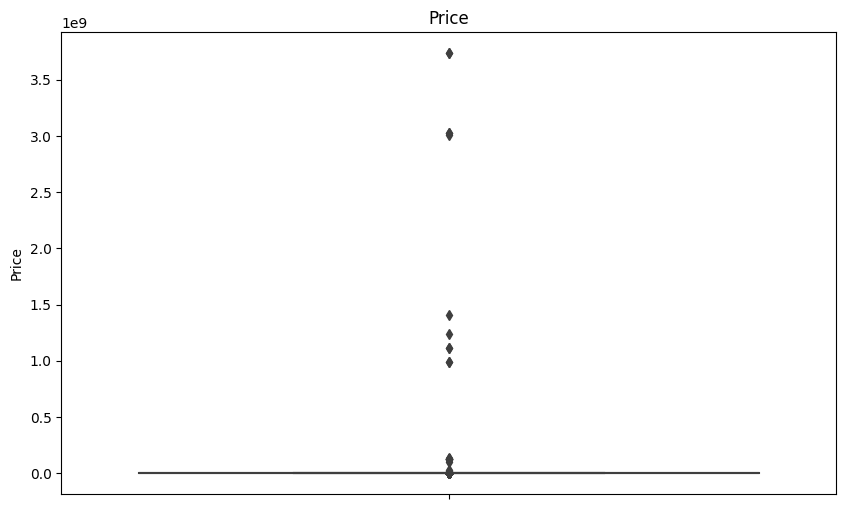

In [123]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['price'])
plt.title("Price")
plt.ylabel("Price")

In [124]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mean_price = df['price'].mean()

df['price'] = np.where((df['price'] < lower_bound) | (df['price'] > upper_bound), mean_price, df['price'])

In [125]:
df.price.describe()

count   426780.00
mean     17470.31
std      15319.28
min          0.00
25%       5900.00
50%      13950.00
75%      26485.00
max      75212.35
Name: price, dtype: float64

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426780 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426780 non-null  object 
 1   price         426780 non-null  float64
 2   year          426780 non-null  int32  
 3   manufacturer  426780 non-null  object 
 4   condition     426780 non-null  object 
 5   cylinders     426780 non-null  int64  
 6   fuel          426780 non-null  object 
 7   odometer      426780 non-null  float64
 8   title_status  426780 non-null  object 
 9   transmission  426780 non-null  object 
 10  drive         426780 non-null  object 
 11  type          426780 non-null  object 
 12  state         426780 non-null  object 
 13  mileage       426780 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(10)
memory usage: 47.2+ MB


### "Year" Outliers

**Below:** We can see that the earliest year listed was 1900 and the highest was 2022, with the mean being 2011. Since there is nothing to say that these vehicles cannot exist, they are all viable options. However, I feel it is unlikely there are many, if any, cars that would be for sale on craigslist that are over a 100 years old. As such, I am going to reimpute the oldest cars to 1940.

In [127]:
df.year.describe()

count   426780.00
mean      2011.23
std          9.44
min       1900.00
25%       2008.00
50%       2013.00
75%       2017.00
max       2022.00
Name: year, dtype: float64

C:\Users\kmell\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Year')

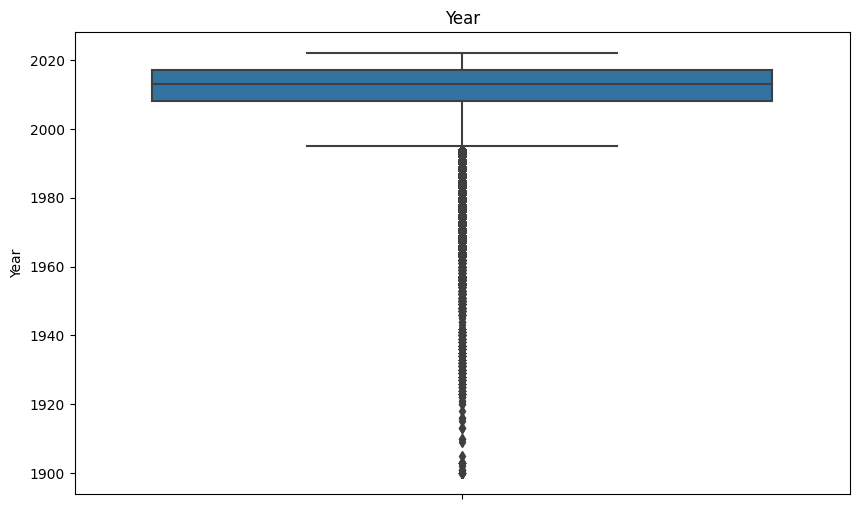

In [128]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['year'])
plt.title("Year")
plt.ylabel("Year")

In [129]:
df['year'] = df['year'].apply(lambda x: 1940 if x < 1940 else x)

In [130]:
df.year.describe()

count   426780.00
mean      2011.25
std          9.30
min       1940.00
25%       2008.00
50%       2013.00
75%       2017.00
max       2022.00
Name: year, dtype: float64

### "Manufacturer" Outliers

While there are 43 unique values, with some of the most notable manufacturers (ford, chevrolet, toyota) taking the top values, there is no reason to believe the manufacturers with less values are outliers, and therefore. I am opting to say that there is no outliers that need any imputing done.

In [131]:
df.manufacturer.nunique()

43

In [132]:
df.manufacturer.value_counts()

manufacturer
ford               70966
chevrolet          55053
toyota             34194
honda              21263
nissan             19065
jeep               19010
ram                18341
unknown            17642
gmc                16775
bmw                14694
dodge              13705
mercedes-benz      11816
hyundai            10336
subaru              9492
volkswagen          9344
kia                 8453
lexus               8198
audi                7571
cadillac            6953
chrysler            6030
acura               5976
buick               5500
mazda               5426
infiniti            4801
lincoln             4219
volvo               3374
mitsubishi          3291
mini                2376
pontiac             2288
rover               2113
jaguar              1945
porsche             1383
mercury             1183
saturn              1090
alfa-romeo           896
tesla                868
fiat                 791
harley-davidson      153
ferrari               95
datsun      

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426780 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426780 non-null  object 
 1   price         426780 non-null  float64
 2   year          426780 non-null  int64  
 3   manufacturer  426780 non-null  object 
 4   condition     426780 non-null  object 
 5   cylinders     426780 non-null  int64  
 6   fuel          426780 non-null  object 
 7   odometer      426780 non-null  float64
 8   title_status  426780 non-null  object 
 9   transmission  426780 non-null  object 
 10  drive         426780 non-null  object 
 11  type          426780 non-null  object 
 12  state         426780 non-null  object 
 13  mileage       426780 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 48.8+ MB


### "Condition" Outliers

There is no outliers, as all entries fall into 1 of 6 reasonable categories.

In [134]:
df.condition.nunique()

6

In [135]:
df.condition.value_counts()

condition
excellent    210397
good         186467
like new      21177
fair           6819
new            1319
salvage         601
Name: count, dtype: int64

### "Cylinder" Outliers

Even though there is class imbalance, all entries fall into 1 of 8 categories, which are all reasonable (there are vehicles with up 12 cylinders).

In [136]:
df.cylinders.nunique()

8

In [137]:
df.cylinders.value_counts()

cylinders
6     146220
8     140959
4     133332
0       2499
5       1739
10      1209
3        628
12       194
Name: count, dtype: int64

### "Fuel" Outliers

While the vast majority of the entries fall under "gas", all entries fall within 5 reasonable categories. There are no outliers.

In [138]:
df.fuel.nunique()

5

In [139]:
df.fuel.value_counts()

fuel
gas         359137
other        30722
diesel       30055
hybrid        5168
electric      1698
Name: count, dtype: int64

### "Odometer" Outliers

There are some outliers, specifically with the max being 10,000,000 miles, I am going to use the IQR method and use the median for mileage above the upper bound.

In [140]:
df.odometer.describe()

count     426780.00
mean       98044.85
std       212799.09
min            0.00
25%        38130.00
50%        86600.00
75%       133000.00
max     10000000.00
Name: odometer, dtype: float64

C:\Users\kmell\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Miles')

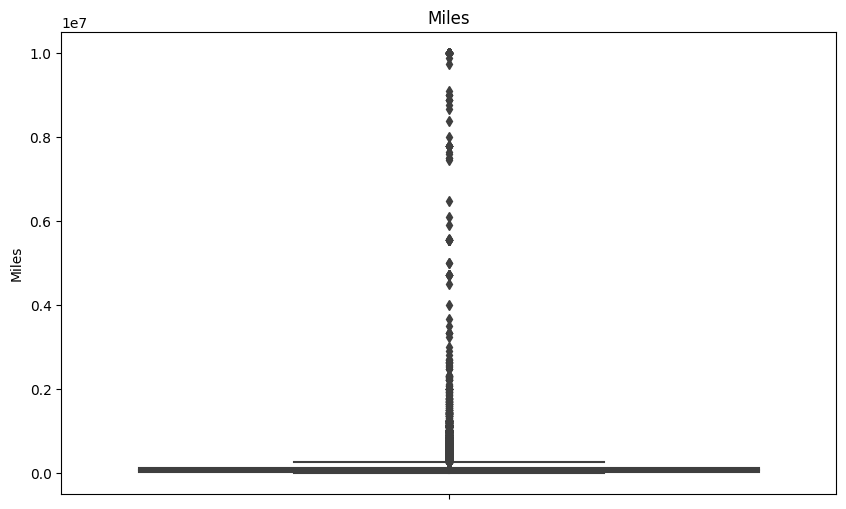

In [141]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['odometer'])
plt.title("Miles")
plt.ylabel("Miles")

In [142]:
median_odometer = df['odometer'].median()

df['odometer'] = np.where(df['odometer'] > upper_bound, median_odometer, df['odometer'])

In [143]:
df.odometer.describe()

count   426780.00
mean     65615.38
std      30192.60
min          0.00
25%      38130.00
50%      86600.00
75%      86600.00
max      86600.00
Name: odometer, dtype: float64

### "Title_Status" Outliers

There are no outliers because all entrties fall into 1 of 6 reasonable categories.

In [144]:
df.title_status.nunique()

6

In [145]:
df.title_status.value_counts()

title_status
clean         413262
rebuilt         7217
salvage         3867
lien            1422
missing          814
parts only       198
Name: count, dtype: int64

### "Transmission" Outliers

There are no outliers since all entries fall into 1 of 3 reasonable categories.

In [146]:
df.transmission.nunique()

3

In [147]:
df.transmission.value_counts()

transmission
automatic    339004
other         62667
manual        25109
Name: count, dtype: int64

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426780 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426780 non-null  object 
 1   price         426780 non-null  float64
 2   year          426780 non-null  int64  
 3   manufacturer  426780 non-null  object 
 4   condition     426780 non-null  object 
 5   cylinders     426780 non-null  int64  
 6   fuel          426780 non-null  object 
 7   odometer      426780 non-null  float64
 8   title_status  426780 non-null  object 
 9   transmission  426780 non-null  object 
 10  drive         426780 non-null  object 
 11  type          426780 non-null  object 
 12  state         426780 non-null  object 
 13  mileage       426780 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 48.8+ MB


### "Drive" Outliers

There are no outliers because all entries fall into 1 of 3 reasonable categories.

In [149]:
df.drive.nunique()

3

In [150]:
df.drive.value_counts()

drive
4wd    190435
fwd    167800
rwd     68545
Name: count, dtype: int64

### "Type" Outliers

There are no outliers, since all entries fall into 1 of 13 categories, which are all types of vehicles.

In [151]:
df.type.nunique()

13

In [152]:
df.type.value_counts()

type
sedan          113051
SUV             99686
pickup          79161
truck           43464
other           22147
coupe           19199
hatchback       17098
wagon           10747
van              8545
convertible      7731
mini-van         4825
offroad           609
bus               517
Name: count, dtype: int64

### "State" Outliers

There are no outliers because all entries fall under the 50 states + D.C. (51 values).

In [153]:
df.state.nunique()

51

In [154]:
df.state.value_counts()

state
ca    50601
fl    28503
tx    22938
ny    19378
oh    17694
or    17098
mi    16898
nc    15274
wa    13859
pa    13751
wi    11395
co    11085
tn    11064
va    10732
il    10384
nj     9739
id     8959
az     8676
ia     8632
ma     8173
mn     7714
ga     7002
ok     6791
sc     6325
mt     6292
ks     6208
in     5704
ct     5187
al     4953
md     4778
nm     4421
mo     4293
ky     4149
ar     4037
ak     3473
nv     3194
la     3194
nh     2981
dc     2969
me     2965
hi     2964
vt     2513
ri     2320
sd     1301
ut     1150
wv     1052
ne     1035
ms     1015
de      948
wy      609
nd      410
Name: count, dtype: int64

### "Mileage" Outliers

there is no outliers because I created this feature to include 3 categories, where all entries fall into 1o f the 3 categories.

In [155]:
df.mileage.nunique()

3

In [156]:
df.mileage.value_counts()

mileage
low       154474
medium    138917
high      133389
Name: count, dtype: int64

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426780 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426780 non-null  object 
 1   price         426780 non-null  float64
 2   year          426780 non-null  int64  
 3   manufacturer  426780 non-null  object 
 4   condition     426780 non-null  object 
 5   cylinders     426780 non-null  int64  
 6   fuel          426780 non-null  object 
 7   odometer      426780 non-null  float64
 8   title_status  426780 non-null  object 
 9   transmission  426780 non-null  object 
 10  drive         426780 non-null  object 
 11  type          426780 non-null  object 
 12  state         426780 non-null  object 
 13  mileage       426780 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 48.8+ MB


### Part 4, Section 4: Data Cleaning Table

**IMPORTANT NOTE:** I am commenting out this section because I like to re-run my code and I don't want it to run this section each time.

**Below:** I created a table in PgAdmin that that stored all the actions I took to clean my data. I can use this when I develp my UDFs in the other notebooks.

In [158]:
# connection = psycopg2.connect(
#    host = r'127.0.0.1', 
#    database = r'MSDS610', 
#    user = r'postgres', 
#    password = r'postgres', 
#    port = r'5432')
#cursor = connection.cursor()

In [159]:
# sql_command = """
#    CREATE TABLE clean_data_rules(
#       feature TEXT,
#       description TEXT,
#       action TEXT);
#       """

In [160]:
# cursor.execute(sql_command)

![pgAdmin Screenshot](msds_610_final_project_cleaning_rules_pgadm_img.png)

# Part 5: Feature Engineering & Normalization

## Part 5, Section 1: New Features

### New Feature 1: Mileage

This is a feature that I created during the feature selection process, which classifies if the vehicle has "low", "medium", or "high" mileage. this was a useful feature for imputing some NULLs, but it can be useful in predictions, because it creates categories for the countinuous value of "odometer" (miles). I can then normalize this by turning each category into an integer, which is the preferred data type for MLs. 

In [161]:
df.mileage.value_counts()

mileage
low       154474
medium    138917
high      133389
Name: count, dtype: int64

### New Feature 2: Age

This feature lists the age of the vehicle using the "year" feature. This will be useful for predicting cost because the older the car the more it depreciates (unless it is a vintage). I am u sing the "datetime" function to create this feature. Since the age is a direct correlation to "year", I am going to drop "year" to avoid correlation conflicts.

In [162]:
current_year = datetime.datetime.now().year
df['age'] = current_year - df['year']

In [163]:
df.age.sample()

392571    11
Name: age, dtype: int64

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426780 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426780 non-null  object 
 1   price         426780 non-null  float64
 2   year          426780 non-null  int64  
 3   manufacturer  426780 non-null  object 
 4   condition     426780 non-null  object 
 5   cylinders     426780 non-null  int64  
 6   fuel          426780 non-null  object 
 7   odometer      426780 non-null  float64
 8   title_status  426780 non-null  object 
 9   transmission  426780 non-null  object 
 10  drive         426780 non-null  object 
 11  type          426780 non-null  object 
 12  state         426780 non-null  object 
 13  mileage       426780 non-null  object 
 14  age           426780 non-null  int64  
dtypes: float64(2), int64(3), object(10)
memory usage: 52.1+ MB


In [165]:
df.drop(columns=['year'], inplace=True)

### New Feature 3: Luxury vs Non-Luxury Brands

For this feature, I am developing a binary (0/1) for if the manufacturer is considered a "luxury" brand. This will help in prediction, because luxury brands tend to maintain higher resale value. I have identified 13 brands (out of the 43 total brands) that I believe to be "luxury" brands. This has personal bias, because someone else might classify the brands differently. For the binary, 1 represent luxury brand and 0 represents non-luxury. There are roughly 75,000 entries that are considered luxury.

In [166]:
df.manufacturer.nunique()

43

In [167]:
df.manufacturer.value_counts()

manufacturer
ford               70966
chevrolet          55053
toyota             34194
honda              21263
nissan             19065
jeep               19010
ram                18341
unknown            17642
gmc                16775
bmw                14694
dodge              13705
mercedes-benz      11816
hyundai            10336
subaru              9492
volkswagen          9344
kia                 8453
lexus               8198
audi                7571
cadillac            6953
chrysler            6030
acura               5976
buick               5500
mazda               5426
infiniti            4801
lincoln             4219
volvo               3374
mitsubishi          3291
mini                2376
pontiac             2288
rover               2113
jaguar              1945
porsche             1383
mercury             1183
saturn              1090
alfa-romeo           896
tesla                868
fiat                 791
harley-davidson      153
ferrari               95
datsun      

In [168]:
luxury_brands = [
    'bmw', 
    'mercedes-benz', 
    'lexus', 
    'audi', 
    'cadillac', 
    'acura',
    'infiniti', 
    'lincoln', 
    'volvo', 
    'jaguar', 
    'porsche', 
    'land rover',
    'rover', 
    'alfa-romeo', 
    'tesla', 
    'ferrari', 
    'aston-martin']

In [169]:
df['luxury'] = df['manufacturer'].apply(lambda x: 1 if x.lower() in luxury_brands else 0)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426780 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426780 non-null  object 
 1   price         426780 non-null  float64
 2   manufacturer  426780 non-null  object 
 3   condition     426780 non-null  object 
 4   cylinders     426780 non-null  int64  
 5   fuel          426780 non-null  object 
 6   odometer      426780 non-null  float64
 7   title_status  426780 non-null  object 
 8   transmission  426780 non-null  object 
 9   drive         426780 non-null  object 
 10  type          426780 non-null  object 
 11  state         426780 non-null  object 
 12  mileage       426780 non-null  object 
 13  age           426780 non-null  int64  
 14  luxury        426780 non-null  int64  
dtypes: float64(2), int64(3), object(10)
memory usage: 52.1+ MB


In [171]:
df.luxury.value_counts()

luxury
0    351833
1     74947
Name: count, dtype: int64

## Part 5, Section 2: Normalization Table in PGAdmin

**IMPORTANT NOTE:** I am commenting this section out so that it doesn't re-run everytime I re-run my notebook.

In [172]:
# connection = psycopg2.connect(
#   host = r'127.0.0.1', 
#   database = r'MSDS610', 
#   user = r'postgres', 
#   password = r'postgres', 
#   port = r'5432')
# cursor = connection.cursor()

In [173]:
# sql_command = """
#    CREATE TABLE normalization_rules(
#      feature TEXT,
#      description TEXT,
#      action TEXT);
#      """

In [174]:
# cursor.execute(sql_command)

In [175]:
# connection.commit()

![pgAdmin Screenshot](msds_610_final_project_normalization_rules_pgadm_img.png)

## Part 5, Section 3: Encoding and Normalizing

### "Region" Normalization

We want to normalize region by converting them into numbers. Because there is 404 unique values, I am going to encode them using  the "first" ranking method. It classifies each uniqiue region with a unique number based on on the value counts. I used the "first" ranking so in instances where regions have the same frequency, the first one the function comes across gets the next ranking mumber, with the next same frequency region follows with the next ranking suit after that. While this encoding might assume ranking, the alternative is using "get_dummies" and that would create too many columns, given that there are 404 unique values. I am opting to stick to the frequency encoding.

Additionally, because the encoding is based on frequency, I need to create a dictionary and output it (as a pkl) because using this encoding method on the raw data will generate different values for the categories, and I need to maintain the same encoding.

In [176]:
df.region.nunique()

404

In [177]:
df.region.value_counts()

region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2987
fresno / madera            2983
eugene                     2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64

In [178]:
region_freq_map = df['region'].value_counts().to_dict()

In [179]:
region_rank_map = pd.Series(region_freq_map).rank(method='first', ascending=False).to_dict()

In [180]:
with open('region_rank_map.pkl', 'wb') as file:
    pickle.dump(region_rank_map, file)

In [181]:
df['region_encoded'] = df['region'].map(region_rank_map)

In [182]:
df.region_encoded.value_counts()

region_encoded
1.00      3608
2.00      3562
3.00      2987
4.00      2983
5.00      2983
          ... 
400.00      28
401.00      14
402.00      11
403.00       9
404.00       8
Name: count, Length: 404, dtype: int64

In [183]:
df.region_encoded.nunique()

404

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426780 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   region          426780 non-null  object 
 1   price           426780 non-null  float64
 2   manufacturer    426780 non-null  object 
 3   condition       426780 non-null  object 
 4   cylinders       426780 non-null  int64  
 5   fuel            426780 non-null  object 
 6   odometer        426780 non-null  float64
 7   title_status    426780 non-null  object 
 8   transmission    426780 non-null  object 
 9   drive           426780 non-null  object 
 10  type            426780 non-null  object 
 11  state           426780 non-null  object 
 12  mileage         426780 non-null  object 
 13  age             426780 non-null  int64  
 14  luxury          426780 non-null  int64  
 15  region_encoded  426780 non-null  float64
dtypes: float64(3), int64(3), object(10)
memory usage: 55.4+ MB


In [185]:
df.drop(columns=['region'], inplace=True)

### "Price" Normalization: Target

Since "Price" is my target feature, I will not be encoding.

### "Manufacturer" Encoding

Since "manufacturer" is text-based, and has 42 unique values, I am going to encode using the same method I did with "region", which will use the the "first" frequency ranking method, to ensure that each value gets a unique number. The same idea applies as "region", where "get_dummies" might prevent ordinality, I am opting to maintain my frequency ranking, due to the vast amount of columns this would create.

Same with "region", due to the frequency encoding, I need to create a dictionary that normalizes the values, so that when I apply it to the live data it will use the right values.

In [186]:
manufacturer_freq_map = df['manufacturer'].value_counts().to_dict()

In [187]:
manufacturer_rank_map = pd.Series(manufacturer_freq_map).rank(method='first', ascending=False).to_dict()

In [188]:
with open('manufacturer_rank_map.pkl', 'wb') as file:
    pickle.dump(manufacturer_rank_map, file)

In [189]:
df['manufacturer_encoded'] = df['manufacturer'].map(manufacturer_rank_map)
df.manufacturer_encoded.sample(3)

22218    17.00
420121   14.00
13090     6.00
Name: manufacturer_encoded, dtype: float64

In [190]:
df.drop(columns=['manufacturer'], inplace=True)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426780 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 426780 non-null  float64
 1   condition             426780 non-null  object 
 2   cylinders             426780 non-null  int64  
 3   fuel                  426780 non-null  object 
 4   odometer              426780 non-null  float64
 5   title_status          426780 non-null  object 
 6   transmission          426780 non-null  object 
 7   drive                 426780 non-null  object 
 8   type                  426780 non-null  object 
 9   state                 426780 non-null  object 
 10  mileage               426780 non-null  object 
 11  age                   426780 non-null  int64  
 12  luxury                426780 non-null  int64  
 13  region_encoded        426780 non-null  float64
 14  manufacturer_encoded  426780 non-null  float64
dtypes: fl

### "Condition" Encoding

Since "condition" is an ordinal ranking, the best way to encode is using the ordinality-based encoding. So the higher the number, the better the quality. Since there are 6 values, I will be labelling the best condition (new) as 5, all the way down to the worst condition (salvage) as 0

In [192]:
df.condition.nunique()

6

In [193]:
df.condition.value_counts()

condition
excellent    210397
good         186467
like new      21177
fair           6819
new            1319
salvage         601
Name: count, dtype: int64

In [194]:
condition_mapping = {
    'new': 5,
    'like new': 4,
    'excellent': 3,
    'good': 2,
    'fair': 1,
    'salvage': 0}

In [195]:
df['condition_encoded'] = df['condition'].map(condition_mapping)

In [196]:
df.condition_encoded.value_counts()

condition_encoded
3    210397
2    186467
4     21177
1      6819
5      1319
0       601
Name: count, dtype: int64

In [197]:
df.drop(columns=['condition'], inplace=True)

### "Cylinders" Encoding

"Cylinders" has already been encoded, with the integer representing the number of cylinders, and "other" as 0.

In [198]:
df.cylinders.value_counts()

cylinders
6     146220
8     140959
4     133332
0       2499
5       1739
10      1209
3        628
12       194
Name: count, dtype: int64

### "Fuel" Encoding

Since "fuel" only has 5 values, I am opting to encode using "get_dummies", which will create a boolean columns for each of the 

In [199]:
df.fuel.value_counts()

fuel
gas         359137
other        30722
diesel       30055
hybrid        5168
electric      1698
Name: count, dtype: int64

In [200]:
df = pd.get_dummies(df, columns=['fuel'], drop_first=True)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426780 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 426780 non-null  float64
 1   cylinders             426780 non-null  int64  
 2   odometer              426780 non-null  float64
 3   title_status          426780 non-null  object 
 4   transmission          426780 non-null  object 
 5   drive                 426780 non-null  object 
 6   type                  426780 non-null  object 
 7   state                 426780 non-null  object 
 8   mileage               426780 non-null  object 
 9   age                   426780 non-null  int64  
 10  luxury                426780 non-null  int64  
 11  region_encoded        426780 non-null  float64
 12  manufacturer_encoded  426780 non-null  float64
 13  condition_encoded     426780 non-null  int64  
 14  fuel_electric         426780 non-null  bool   
 15  fuel_

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426780 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 426780 non-null  float64
 1   cylinders             426780 non-null  int64  
 2   odometer              426780 non-null  float64
 3   title_status          426780 non-null  object 
 4   transmission          426780 non-null  object 
 5   drive                 426780 non-null  object 
 6   type                  426780 non-null  object 
 7   state                 426780 non-null  object 
 8   mileage               426780 non-null  object 
 9   age                   426780 non-null  int64  
 10  luxury                426780 non-null  int64  
 11  region_encoded        426780 non-null  float64
 12  manufacturer_encoded  426780 non-null  float64
 13  condition_encoded     426780 non-null  int64  
 14  fuel_electric         426780 non-null  bool   
 15  fuel_

### "Odometer" Encoding

I am going to use the Standard Scaler to normalize the odometer, because "odometer" is a continuous value, and I want to represent all values around 0, which will assist the ML model, since scaling is easier for ML models to handle.

In [203]:
df.odometer.info()

<class 'pandas.core.series.Series'>
Index: 426780 entries, 0 to 426879
Series name: odometer
Non-Null Count   Dtype  
--------------   -----  
426780 non-null  float64
dtypes: float64(1)
memory usage: 6.5 MB


In [204]:
df.odometer.sample(3)

388441   86600.00
14320    86600.00
335521   86600.00
Name: odometer, dtype: float64

In [205]:
scaler = StandardScaler()

In [206]:
df['odometer_encoded'] = scaler.fit_transform(df[['odometer']])

In [207]:
df.odometer_encoded.sample(5)

223301   0.70
251732   0.70
90949    0.70
375187   0.70
79772    0.70
Name: odometer_encoded, dtype: float64

In [208]:
df.drop(columns=['odometer'], inplace=True)

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426780 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 426780 non-null  float64
 1   cylinders             426780 non-null  int64  
 2   title_status          426780 non-null  object 
 3   transmission          426780 non-null  object 
 4   drive                 426780 non-null  object 
 5   type                  426780 non-null  object 
 6   state                 426780 non-null  object 
 7   mileage               426780 non-null  object 
 8   age                   426780 non-null  int64  
 9   luxury                426780 non-null  int64  
 10  region_encoded        426780 non-null  float64
 11  manufacturer_encoded  426780 non-null  float64
 12  condition_encoded     426780 non-null  int64  
 13  fuel_electric         426780 non-null  bool   
 14  fuel_gas              426780 non-null  bool   
 15  fuel_

### "Title Status" Encoding

Just like the "condition" feature, "title_status" has values that can be viewed as ordinal ("clean" better than "rebuilt" better than "parts only". I think this could also be considered nominal, and get_dummies can be used. I am opting to take the ordinality route due to the nature of some statuses are certainly better than others. By making this choice, I recognize I am imparting personal bias into the data.

In [210]:
df.title_status.value_counts()

title_status
clean         413262
rebuilt         7217
salvage         3867
lien            1422
missing          814
parts only       198
Name: count, dtype: int64

In [211]:
title_status_mapping = {
    'clean': 5,
    'rebuilt': 4,
    'salvage': 3,
    'lien': 2,
    'missing': 1,
    'parts only': 0}

In [212]:
df['title_encoded'] = df['title_status'].map(title_status_mapping)

In [213]:
df.drop(columns=['title_status'], inplace=True)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426780 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 426780 non-null  float64
 1   cylinders             426780 non-null  int64  
 2   transmission          426780 non-null  object 
 3   drive                 426780 non-null  object 
 4   type                  426780 non-null  object 
 5   state                 426780 non-null  object 
 6   mileage               426780 non-null  object 
 7   age                   426780 non-null  int64  
 8   luxury                426780 non-null  int64  
 9   region_encoded        426780 non-null  float64
 10  manufacturer_encoded  426780 non-null  float64
 11  condition_encoded     426780 non-null  int64  
 12  fuel_electric         426780 non-null  bool   
 13  fuel_gas              426780 non-null  bool   
 14  fuel_hybrid           426780 non-null  bool   
 15  fuel_

### "Transmission" Encoding

Since "transmission" only has 3 unique values and they are not ordinal, I am going to use get_dummies to create boolean columns for each transmission type.

In [215]:
df.transmission.value_counts()

transmission
automatic    339004
other         62667
manual        25109
Name: count, dtype: int64

In [216]:
df = pd.get_dummies(df, columns=['transmission'], drop_first=True)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426780 entries, 0 to 426879
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 426780 non-null  float64
 1   cylinders             426780 non-null  int64  
 2   drive                 426780 non-null  object 
 3   type                  426780 non-null  object 
 4   state                 426780 non-null  object 
 5   mileage               426780 non-null  object 
 6   age                   426780 non-null  int64  
 7   luxury                426780 non-null  int64  
 8   region_encoded        426780 non-null  float64
 9   manufacturer_encoded  426780 non-null  float64
 10  condition_encoded     426780 non-null  int64  
 11  fuel_electric         426780 non-null  bool   
 12  fuel_gas              426780 non-null  bool   
 13  fuel_hybrid           426780 non-null  bool   
 14  fuel_other            426780 non-null  bool   
 15  odome

### "Drive" Encoding

Same as "transmission", "drive" has only 3 unique values, which are non-ordinal. So I will be using "dummies" to generate boolean values for each value for each entry.

In [218]:
df.drive.value_counts()

drive
4wd    190435
fwd    167800
rwd     68545
Name: count, dtype: int64

In [219]:
df = pd.get_dummies(df, columns=['drive'], drop_first=True)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426780 entries, 0 to 426879
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 426780 non-null  float64
 1   cylinders             426780 non-null  int64  
 2   type                  426780 non-null  object 
 3   state                 426780 non-null  object 
 4   mileage               426780 non-null  object 
 5   age                   426780 non-null  int64  
 6   luxury                426780 non-null  int64  
 7   region_encoded        426780 non-null  float64
 8   manufacturer_encoded  426780 non-null  float64
 9   condition_encoded     426780 non-null  int64  
 10  fuel_electric         426780 non-null  bool   
 11  fuel_gas              426780 non-null  bool   
 12  fuel_hybrid           426780 non-null  bool   
 13  fuel_other            426780 non-null  bool   
 14  odometer_encoded      426780 non-null  float64
 15  title

### "Type" Encoding

Same as "transmission" and "drive", "type" doesn't have an unmanageable amount of unique values, which are non-ordinal. So I will be using "dummies" to generate boolean values for each value for each entry.

In [221]:
df.type.value_counts()

type
sedan          113051
SUV             99686
pickup          79161
truck           43464
other           22147
coupe           19199
hatchback       17098
wagon           10747
van              8545
convertible      7731
mini-van         4825
offroad           609
bus               517
Name: count, dtype: int64

In [222]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)

### "State" Encoding

Just like "manufacturer" and "region", "state" has many unique values (51) and I am opting to use the frequency ranking and creating a pkl file to store the values, which I can then use on my "live" data.

In [223]:
state_freq_map = df['state'].value_counts().to_dict()

In [224]:
state_rank_map = pd.Series(state_freq_map).rank(method='first', ascending=False).to_dict()

In [225]:
with open('state_rank_map.pkl', 'wb') as file:
    pickle.dump(state_rank_map, file)

In [226]:
df['state_encoded'] = df['state'].map(state_rank_map)

In [227]:
df.state_encoded.nunique()

51

In [228]:
df = df.drop(columns="state")

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426780 entries, 0 to 426879
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 426780 non-null  float64
 1   cylinders             426780 non-null  int64  
 2   mileage               426780 non-null  object 
 3   age                   426780 non-null  int64  
 4   luxury                426780 non-null  int64  
 5   region_encoded        426780 non-null  float64
 6   manufacturer_encoded  426780 non-null  float64
 7   condition_encoded     426780 non-null  int64  
 8   fuel_electric         426780 non-null  bool   
 9   fuel_gas              426780 non-null  bool   
 10  fuel_hybrid           426780 non-null  bool   
 11  fuel_other            426780 non-null  bool   
 12  odometer_encoded      426780 non-null  float64
 13  title_encoded         426780 non-null  int64  
 14  transmission_manual   426780 non-null  bool   
 15  trans

### "Mileage" Encoded

Since mileage is ordinal categories, I am going to use ordinality numbering.

In [230]:
df.mileage.value_counts()

mileage
low       154474
medium    138917
high      133389
Name: count, dtype: int64

In [231]:
mileage_map = {'low': 0, 'medium': 1, 'high': 2}

In [232]:
df['mileage_encoded'] = df['mileage'].map(mileage_map)

In [233]:
df = df.drop(columns='mileage')

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426780 entries, 0 to 426879
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 426780 non-null  float64
 1   cylinders             426780 non-null  int64  
 2   age                   426780 non-null  int64  
 3   luxury                426780 non-null  int64  
 4   region_encoded        426780 non-null  float64
 5   manufacturer_encoded  426780 non-null  float64
 6   condition_encoded     426780 non-null  int64  
 7   fuel_electric         426780 non-null  bool   
 8   fuel_gas              426780 non-null  bool   
 9   fuel_hybrid           426780 non-null  bool   
 10  fuel_other            426780 non-null  bool   
 11  odometer_encoded      426780 non-null  float64
 12  title_encoded         426780 non-null  int64  
 13  transmission_manual   426780 non-null  bool   
 14  transmission_other    426780 non-null  bool   
 15  drive

In [235]:
df.head(1)

,price,cylinders,age,luxury,region_encoded,manufacturer_encoded,condition_encoded,fuel_electric,fuel_gas,fuel_hybrid,...,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,state_encoded,mileage_encoded
0,6000.00,4,14,0,174.00,8.00,3,False,True,False,...,False,False,False,False,True,False,False,False,18.00,1


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426780 entries, 0 to 426879
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 426780 non-null  float64
 1   cylinders             426780 non-null  int64  
 2   age                   426780 non-null  int64  
 3   luxury                426780 non-null  int64  
 4   region_encoded        426780 non-null  float64
 5   manufacturer_encoded  426780 non-null  float64
 6   condition_encoded     426780 non-null  int64  
 7   fuel_electric         426780 non-null  bool   
 8   fuel_gas              426780 non-null  bool   
 9   fuel_hybrid           426780 non-null  bool   
 10  fuel_other            426780 non-null  bool   
 11  odometer_encoded      426780 non-null  float64
 12  title_encoded         426780 non-null  int64  
 13  transmission_manual   426780 non-null  bool   
 14  transmission_other    426780 non-null  bool   
 15  drive

### Part 5, Section 4: Exporting Clean Data to PGAdmin

**Below:** I am creating a copy of the cleaned dataset into PgAdmin so that I can access it in different notebooks.

In [237]:
host = r'127.0.0.1' 
db = r'MSDS610' 
user = r'postgres' 
pw = r'postgres' 
port = r'5432'
schema = r'cleaned'

In [238]:
db_conn = create_engine("postgresql://{}:{}@{}:{}/{}".format(user, pw, host, port, db))

In [239]:
sql = "SELECT tables.table_name FROM information_schema.tables WHERE table_schema = '" + schema + "' ORDER BY 1;"
sql

"SELECT tables.table_name FROM information_schema.tables WHERE table_schema = 'cleaned' ORDER BY 1;"

In [240]:
tbl_df = pd.read_sql(sql, db_conn, index_col=None)

In [241]:
table_name = r'vehicle_clean'

In [242]:
df.to_sql(table_name, con=db_conn, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')

426780

![pgAdmin Screenshot](msds_610_final_project_clean_df_img.png)